# Machine Learning Model for Gold Recovery

## Introduction

Zyfra is a company that works to improve efficiency and safety among the mining, chemical, engineering, and oil & gas industries by combining and implementing digital solutions within the industrial production landscape. This project is a predictive machine learning modeling project focused on the mining of precious metals, specifically gold. The goal of this project is to select and optimize a predictive model based on the symmetric mean absolute percentage error(sMAPE) metric with the data collected across various stages of the refinement. The model should predict the amount of gold to be recovered from gold ore.  The fundamental, unprocessed data is contained within the provided csv files: *"gold_recovery_train.csv"*, *"gold_recovery_test.csv"*, and *"gold_recovery_full.csv"*

To begin, I will start by inspecting all the data before preprocessing it to make it suitable to train the model.  I'll clean the data by looking for any missing values or duplicate rows that could skew the model shaping, and either replace or remove them entirely. I'll then plot the data to visually check the distribution to identify any outliers, and remove them if necessary. Finally, I'll make sure the training and test sets are uniform in their scope to appropriately analyze potential regression models and shape the final one.

## Imports

In [1]:
#import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.dummy import DummyRegressor
import warnings
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings('ignore')

## Read in data sets

In [2]:
#import all relevant dataframes
df_train = pd.read_csv('/datasets/gold_recovery_train.csv', parse_dates=True)
df_test = pd.read_csv('/datasets/gold_recovery_test.csv', parse_dates=True)
df_source = pd.read_csv('/datasets/gold_recovery_full.csv', parse_dates=True)

all_df = [df_train, df_test, df_source]

## Look into data parameters

In [3]:
#check dataframe shapes
df_train.shape, df_test.shape, df_source.shape

((16860, 87), (5856, 53), (22716, 87))

In [4]:
#get overview of data in df's
for df in all_df:
    print()
    display(df_train.head())
    print()
    df.info()
    print()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_cle

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64

All columns of our data set are numeric except for the 'date' column which is of type 'object'. I will change it to datetime data type to make it easier to work with moving forward.

In [5]:
#convert date datatypes from object to datetime and check conversion
for df in all_df:
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
    print(df.dtypes['date'])

datetime64[ns]
datetime64[ns]
datetime64[ns]


To check if gold recovery was calculated correctly for the target (*rougher.output.recovery*) in the training data set, I have to first simulate the recovery process using this formula to get the percent recovered:

$$Recovery=\frac{Cx(F-T)}{Fx(C-T)}\times100$$

**WHERE:**

* **C** — share of gold in the concentrate right after flotation (for finding the rougher concentrate recovery)/after purification (for finding the final concentrate recovery)

* **F** — share of gold in the feed before flotation (for finding the rougher concentrate recovery)/in the concentrate right after flotation (for finding the final concentrate recovery)

* **T** — share of gold in the rougher tails right after flotation (for finding the rougher concentrate recovery)/after purification (for finding the final concentrate recovery)

**To predict the coefficient I need to find the share of gold in the concentrate and the tails, taking into consideration both final and rougher concentrates**



In [6]:
#function to check if recovery is calculated correctly
def calc_recovery(df, C, F, T):
    recovery = ((df[C] * (df[F] - df[T])) / (df[F] * (df[C] - df[T]))) * 100
    return recovery


In [7]:
#find MAE between the calculated values and actual
calc = calc_recovery(df_train.dropna(subset=['rougher.output.recovery']), 'rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au', )
actual = df_train['rougher.output.recovery'].dropna()
mae = mean_absolute_error(actual, calc)
close = np.allclose(actual, calc)
print('Mean Absolute Error:', mae)
print('Calculated Values Represent Actual Values:', close)

Mean Absolute Error: 9.303415616264301e-15
Calculated Values Represent Actual Values: True


Let's take a look at the feature discrepancy between the training and test sets and their data types

In [8]:
missing_features = df_train.drop(df_test.columns, axis=1)
missing_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                                16794 non-null  float64


There is a 34 feature discrepancy in the test set, including the target feature. These parameters are likely absent from the set due to being measured or calculated at a date after the test set was extracted. All feature data types are float64.

## Data Preprocessing

In [9]:
#check for duplicate rows, columns missing values, and rows missing values 
for df in all_df:
    print('Duplicates:', df.duplicated().sum())
    print()
    print('Missing:')
    print(df.isnull().sum().sort_values(ascending=False))
    print()
    print(df[df.isnull().sum(axis=1)>0].shape)
    print()

Duplicates: 0

Missing:
rougher.output.recovery                               2573
rougher.output.tail_ag                                2250
rougher.output.tail_sol                               2249
rougher.output.tail_au                                2249
secondary_cleaner.output.tail_sol                     1986
rougher.input.floatbank11_xanthate                    1904
final.output.recovery                                 1521
primary_cleaner.input.sulfate                         1307
primary_cleaner.input.depressant                      1262
rougher.calculation.au_pb_ratio                       1242
rougher.input.floatbank10_sulfate                     1044
primary_cleaner.input.xanthate                         985
primary_cleaner.output.concentrate_sol                 636
rougher.input.floatbank11_sulfate                      623
rougher.state.floatbank10_e_air                        603
rougher.input.feed_rate                                513
rougher.input.feed_size         

There are quite a few missing values in the data, however no duplicate rows.  We should remove any rows from the target features (*rougher.output.recovery & final.output.recovery*) with missing values as to not skew our model. However, since a total of 6622 of 22716 rows are missing values, which is close to 30% of all rows, we can't discard all rows missing values. Measurements close in date/time proximity appear to be somewhat similar across all rows, so I'll forward fill some of the missing values based on the time the sample was taken, however any missing values that remain afterward will also have to be dropped.


In [10]:
def preprocess_df(df):
    df = df.groupby(df['date'].dt.date).ffill()
    return df.dropna()

In [11]:
# remove null values from the target columns
df_train = df_train[df_train['rougher.output.recovery'].notnull() | df_train['final.output.recovery'].notnull()]
df_source = df_source[df_source['rougher.output.recovery'].notnull() | df_source['final.output.recovery'].notnull()]

#forward fill as many values as possible & drop the remaining missing values
df_train = preprocess_df(df_train)
df_test = preprocess_df(df_test)
df_source = preprocess_df(df_source)

print(df_train.shape, df_test.shape, df_source.shape)

(12927, 87) (5597, 53) (18274, 87)


In [12]:
#check if all null rows are now removed
print(
      df_train[df_train.isnull().sum(axis=1)>0].shape, 
      df_test[df_test.isnull().sum(axis=1)>0].shape, 
      df_source[df_source.isnull().sum(axis=1)>0].shape
    )

(0, 87) (0, 53) (0, 87)


Now that the missing data has been addressed, I will add the target columns to the test set and align the training set to match the test features in order to make them suitable to select and train our model.

In [13]:
#merge test set with missing target data
df_test = df_test.merge(df_source[['date', 'rougher.output.recovery', 'final.output.recovery']], on='date', how='inner')
print(df_test.shape)
print()
print(df_test.info())

(5347, 55)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5347 entries, 0 to 5346
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5347 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5347 non-null   float64       
 2   primary_cleaner.input.depressant            5347 non-null   float64       
 3   primary_cleaner.input.feed_size             5347 non-null   float64       
 4   primary_cleaner.input.xanthate              5347 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5347 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5347 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5347 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5347 non-null   float64       
 

In [14]:
#match train set features with test set features
test_cols = df_test.columns.values.tolist()
df_train = df_train[test_cols]
print(df_train.shape)
print()
print(df_train.info())

(12927, 55)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12927 entries, 0 to 16859
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        12927 non-null  datetime64[ns]
 1   primary_cleaner.input.sulfate               12927 non-null  float64       
 2   primary_cleaner.input.depressant            12927 non-null  float64       
 3   primary_cleaner.input.feed_size             12927 non-null  float64       
 4   primary_cleaner.input.xanthate              12927 non-null  float64       
 5   primary_cleaner.state.floatbank8_a_air      12927 non-null  float64       
 6   primary_cleaner.state.floatbank8_a_level    12927 non-null  float64       
 7   primary_cleaner.state.floatbank8_b_air      12927 non-null  float64       
 8   primary_cleaner.state.floatbank8_b_level    12927 non-null  float64      

## Data Analysis

### Change in concentration through the purification process by metal

In [15]:
#function to visually compare Au, Ag, Pb through the purification process
stages = ['rougher.input.feed_{}', 
          'rougher.output.concentrate_{}', 
          'primary_cleaner.output.concentrate_{}',
          'final.output.concentrate_{}']

def pure_metal(metal):
    change = [i.format(metal) for i in stages]
    for j in change:
        df_source[j].hist(alpha=0.5, bins=30)
    plt.legend(change)

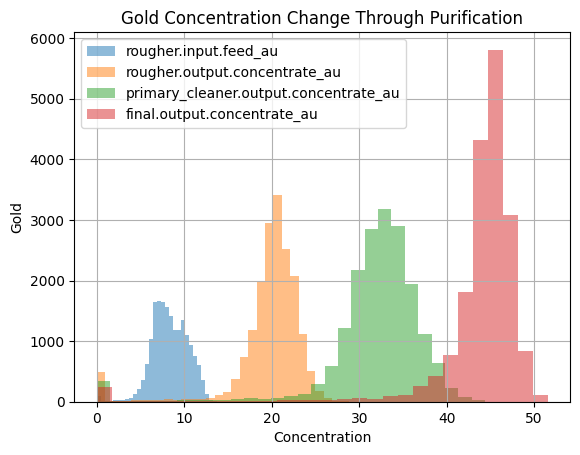

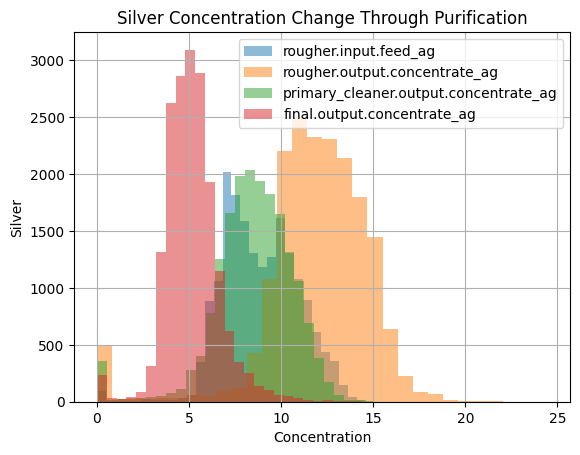

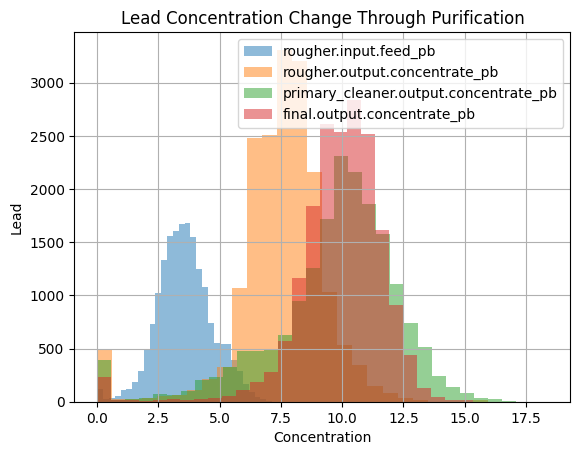

In [16]:
#plot metal purification changes
metals = {'Gold': 'au', 'Silver': 'ag', 'Lead': 'pb'}
for key, value in metals.items():
    pure_metal(value)
    plt.title(f'{key} Concentration Change Through Purification')
    plt.xlabel('Concentration')
    plt.ylabel(key)
    plt.show()

### Compare distribution of particle feed size from the train and test sets

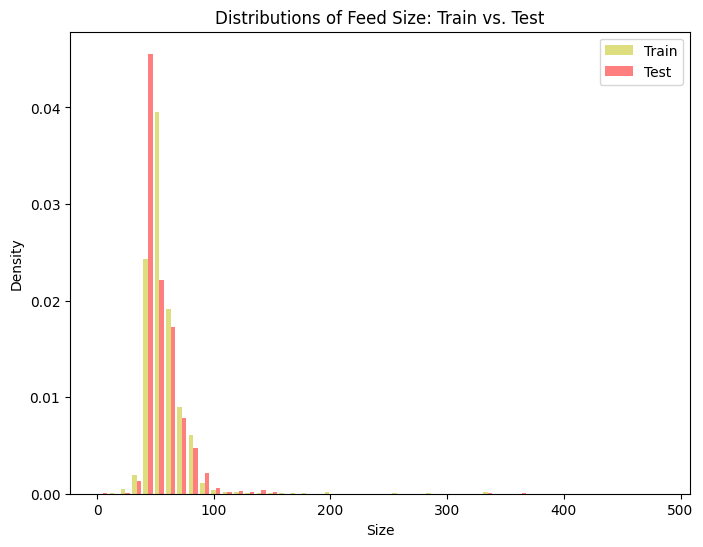

In [17]:
#compare feed size between train and test sets
x = df_train['rougher.input.feed_size']
y = df_test['rougher.input.feed_size']
plt.figure(figsize=(8, 6))
plt.hist([x, y], color=['y', 'r'], alpha=0.5, bins=50, density=True)
plt.title('Distributions of Feed Size: Train vs. Test')
plt.xlabel('Size')
plt.ylabel('Density')
plt.legend(['Train', 'Test'])
plt.show()

The particle feed size looks to have a relatively similar distribution among both the train and test sets. Model evaluation with respect to particle input size should not be thrown off to any significant degree. 

### Total concentration of substance by process stage

In [18]:
#split up the stages of purification for all substances
sub_input = ['rougher.input.feed_au',
            'rougher.input.feed_ag',
            'rougher.input.feed_pb',
            'rougher.input.feed_sol']
    
sub_output = ['rougher.output.concentrate_au',
             'rougher.output.concentrate_ag',
             'rougher.output.concentrate_pb',
             'rougher.output.concentrate_sol']

sub_clean = ['primary_cleaner.output.concentrate_au', 
            'primary_cleaner.output.concentrate_ag',
           'primary_cleaner.output.concentrate_pb',
           'primary_cleaner.output.concentrate_sol']

sub_final = ['final.output.concentrate_au',
            'final.output.concentrate_ag',
            'final.output.concentrate_pb',
            'final.output.concentrate_sol']


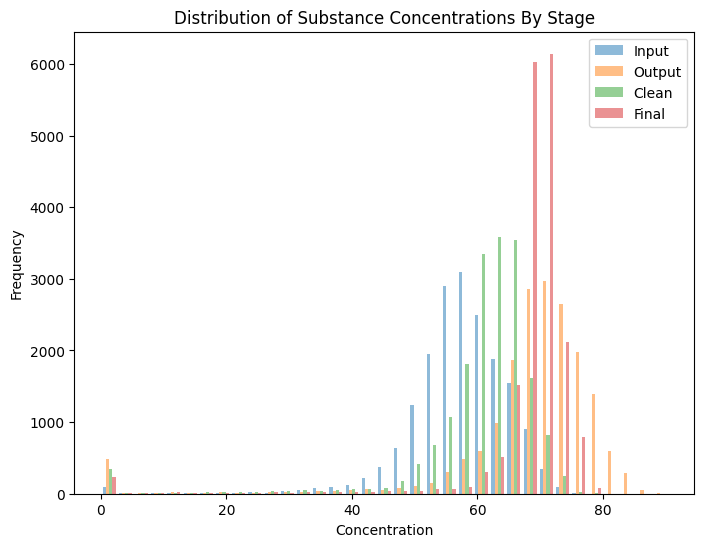

In [19]:
#plot distribution of concentrations of all substances by step
plt.figure(figsize=(8, 6))
plt.hist([df_source[sub_input].sum(axis=1), 
          df_source[sub_output].sum(axis=1),
          df_source[sub_clean].sum(axis=1),
          df_source[sub_final].sum(axis=1)],
          bins=35, alpha=0.5)
plt.legend(['Input', 'Output', 'Clean', 'Final'])          
plt.title(f'Distribution of Substance Concentrations By Stage')
plt.xlabel('Concentration')
plt.ylabel('Frequency')
plt.show()

Looking at the substance concentrations throughout the refinement stages as well as each metal through the series process, we can see an abnormality in the zero range where, presumably, either particles were too small to measure, mismeasured, or missed all together. These outliers will need to be removed to prevent bias being intoduced into the model.  I will remove them from the train and test sets next, as those are the ones that will be used in model selection and training.

### Remove outliers

In [20]:
#remove outliers from train and test sets
df_train = df_train[df_train[sub_input].sum(axis=1) > 0.5]
df_test = df_test[df_test[sub_input].sum(axis=1) > 0.5]


#see how many rows were removed and check that no outliers remain
print(df_train.shape, df_test.shape)
display(df_test[df_test[sub_input].sum(axis=1) < 0.5])
display(df_train[df_train[sub_input].sum(axis=1) < 0.5])

(12836, 55) (5347, 55)


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery


Only about 91 columns were removed as outliers from the train set, and it appears none were removed from the test set.  This makes sense seeing as how the only features in question shared by the two sets are the *rougher.input.feed_{}* columns, with the train set housing many more rows of data, and the other features represented in the plots above now only exist within the source dataframe.  It could be said that it might be more advantageous to split the source set at this point with all the later recorded data, after cleaning, to estimate more robust training and test sets.

## Model Selection

### sMAPE

**To evaluate the chosen model, we need to take into account the scale of both the target values and the predicted values equally. To do this we will use the symmetric Mean Absolute Percentage Error (sMAPE):**

$$sMAPE = \frac{1}{N} \sum\limits_{i=1} ^{N}\frac{|{Y}_{i}-\hat{Y}_{i}|}{(|{Y}_{i}|+|\hat{Y}_{i}|) \div2} \times100$$

**WHERE:**

* ${Y}_{i}$ = Value of target for the observation with the i index in the sample used to measure quality.



* $\hat{Y}_{i}$ = Value of prediction for the observation with the i index, for example, in the test sample.



* ${N}$ = Number of observations in the sample.



* $\sum\limits_{i=1} ^{N}$ = Summation over all observations of the sample (i takes values from 1 to N).




**We need to predict two values for the final sMAPE:**

* rougher concentrate recovery rougher.output.recovery
* final concentrate recovery final.output.recovery


### Final sMAPE

$$Final \: sMAPE \: =  \: 25\% \: \times \: sMAPE(rougher) \: + \: 75\% \: \times \: sMAPE(final)$$


In [31]:
#function for sMAPE of predicted target values
def smape(ans, pred):
    return 100 * np.mean((abs(ans-pred) / ((abs(ans) + abs(pred)) / 2)))

In [22]:
smape_score = make_scorer(smape, greater_is_better=False)

In [39]:
#function for final sMAPE
def final_smape(rough_smape, final_smape):
    return (0.25 * rough_smape + 0.75 * final_smape)
    

### Separate features from target

In [24]:
#divide features and target for model training and tuning
features_train = df_train.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train_rough = df_train['rougher.output.recovery']
target_train_final = df_train['final.output.recovery']

features_test = df_test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test_rough = df_test['rougher.output.recovery']
target_test_final = df_test['final.output.recovery']                           

print(features_train.shape, target_train_rough.shape, target_train_final.shape)
print()
print(features_test.shape, target_test_rough.shape, target_test_final.shape)

(12836, 52) (12836,) (12836,)

(5347, 52) (5347,) (5347,)


### Feature Scaling

In [25]:
scaler = StandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

### Model training and tuning

Here we will evaluate three regression models with cross verification, as well as tune some of their available hyperparameters, to try and achieve a better than random sMAPE score.  It should be noted that the Linear Regression model lacks the same hyperparameter cusomability of the other models.

#### Linear Regression model

In [26]:
lr_model = LinearRegression()

lr_params = [{'fit_intercept': [True, False],
            'normalize': [True, False],
            'copy_X': [True, False]
            }]

mod_1_rough = GridSearchCV(lr_model, lr_params, cv=5, scoring=smape_score)
mod_1_final = GridSearchCV(lr_model, lr_params, cv=5, scoring=smape_score)
mod_1_rough.fit(features_train, target_train_rough)
mod_1_final.fit(features_train, target_train_final)
print(mod_1_rough.best_params_, mod_1_final.best_params_)
print()
lr_score = final_smape(mod_1_rough.best_score_, mod_1_final.best_score_)
print('Linear Regression final sMAPE score:', lr_score)

{'copy_X': True, 'fit_intercept': True, 'normalize': True} {'copy_X': True, 'fit_intercept': True, 'normalize': True}

Linear Regression final sMAPE score: -11.909289622057464


#### Decision Tree Regressor model

In [27]:
dtr_model = DecisionTreeRegressor()

dtr_params = [{'random_state': [12345], 'max_depth': list(range(1, 20))
            }]

mod_2_rough = GridSearchCV(dtr_model, dtr_params, cv=5, scoring=smape_score)
mod_2_final = GridSearchCV(dtr_model, dtr_params, cv=5, scoring=smape_score)
mod_2_rough.fit(features_train, target_train_rough)
mod_2_final.fit(features_train, target_train_final)
print(mod_2_rough.best_params_, mod_2_final.best_params_)
print()
dtr_score = final_smape(mod_2_rough.best_score_, mod_2_final.best_score_)
print('Decision Tree Regressor final sMAPE score:', dtr_score)

{'max_depth': 5, 'random_state': 12345} {'max_depth': 2, 'random_state': 12345}

Decision Tree Regressor final sMAPE score: -11.078830932162205


#### Random Forest Regressor model

In [28]:
rfr_model = RandomForestRegressor()

rfr_params = [{'random_state': [12345], 'max_depth': [5, 10, 15],
            'n_estimators': [30, 80, 160]
            }]

mod_3_rough = GridSearchCV(rfr_model, rfr_params, cv=5, scoring=smape_score)
mod_3_final = GridSearchCV(rfr_model, rfr_params, cv=5, scoring=smape_score)
mod_3_rough.fit(features_train, target_train_rough)
mod_3_final.fit(features_train, target_train_final)
print(mod_3_rough.best_params_, mod_3_final.best_params_)
print()
rfr_score = final_smape(mod_3_rough.best_score_, mod_3_final.best_score_)
print('Random Forest Regressor final sMAPE score:', rfr_score)

{'max_depth': 5, 'n_estimators': 160, 'random_state': 12345} {'max_depth': 5, 'n_estimators': 80, 'random_state': 12345}

Random Forest Regressor final sMAPE score: -10.860894062073717


It appears that the Random Forest Regressor is the least error prone model, with the only final sMAPE under 11%.  We will move ahead with it as our final predictive model and test it with the test data that the model hasn't seen yet.

## Test the final model

In [41]:
r_model = RandomForestRegressor(random_state=12345, max_depth=5 , n_estimators=160 )
f_model = RandomForestRegressor(random_state=12345, max_depth=5 , n_estimators=80 )

r_model.fit(features_train, target_train_rough)
f_model.fit(features_train, target_train_final)

predict_rough = r_model.predict(features_test)
predict_final = f_model.predict(features_test)

ro_smape = smape(target_test_rough, predict_rough)
fi_smape = smape(target_test_final, predict_final)
 
print('Optimized model sMAPE:', final_smape(ro_smape, fi_smape))

Optimized model sMAPE: 10.168194173620568


The score improved slightly from 10.86% to 10.17% on our final model.  To sanity check our model we'll use a dummy model populated with mean values to see if our final model predicts outcomes better than at random.

## Sanity Check model

In [43]:
dummy_rough = DummyRegressor(strategy='median')
dummy_final = DummyRegressor(strategy='median')

dummy_rough.fit(features_train, target_train_rough)
dummy_final.fit(features_train, target_train_final)

pred_rough = dummy_rough.predict(features_test)
pred_final = dummy_final.predict(features_test)

r_smape = smape(target_test_rough, pred_rough)
f_smape = smape(target_test_final, pred_final)

s_smape = final_smape(r_smape, f_smape)
print('Sanity check sMAPE score:', s_smape)

Sanity check sMAPE score: 10.854787770605718


It appears as though the final optimized Random Forest Regressor model is only slightly better than a model populated with mean values.  If I had the comupting power, it would likely be worth defining more hyperparameters in GridSearchCV to further fine tune our model and gain more accuracy.

## Conclusion

Here, we zeroed in on and trained a machine learning regession model now apt to predict the measured extaction of gold from ore to a better-than-random degree. After verifying that the recovery data was calculated correctly using a custom built, industry-utilized equation function, we removed the missing values from the data and looked at various pertinent distributions of the data. From there we narrowed the data to two robust and balanced training and test sets.  Those at hand, we went ahead with model selection.

In the model selection process we tested three separate regression models, evaluating and cross validating them with GridSearchCV, incorporating our custom sMAPE function to determine the best predictive model to use with our data. The sMAPE metric measures prediction deviations both above and below the actual values.  Our model score of 10.16 is just slightly better than the random model that came in just above that at 10.85.  While I don't know what Zyfra's model score threshold is, it would be worth an inquiry into which refinment metrics they rely on the most to perhaps build and tune a more efficient and accurate model around those values specifically.